# Project: TMDB data set



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#data-cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction

### Questions
  <ol>
  <li>Is there Relation Between the budget and revenue?</li>
  <li>What is the most common run time</li>
  </ol>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


we imported some libraries

In [2]:
tmdb = pd.read_csv("tmdb-movies.csv")
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

### General Properties

now we will check if the dataframe have any problems like missing value, duplicates , .....etc


In [3]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

now we noticed a problem in dtype like the release date is object not date

In [4]:
tmdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64



and we noticed in columns : imdb_id , cast , homepage ,director , tagline , keywords , overiew , genres and production_companies have missing values


---




now we will check if there are duplicates

In [5]:
tmdb.duplicated().sum()

np.int64(1)

we noticed that there is one duplicate in whole this data


---



now we will check if there something is not logical

In [6]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


there is no problems


---



<a id="data cleaning"></a>
### Data Cleaning

1st thing we will change the dtype of release_date column into date

In [7]:
tmdb["release_date"] = pd.to_datetime(tmdb["release_date"])
tmdb.info()

C:\Users\Lord Tech\AppData\Local\Temp\ipykernel_11332\882240664.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tmdb["release_date"] = pd.to_datetime(tmdb["release_date"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

Here we change the release_date dtype into date

---



In [8]:
def missing_values(column , replaced):
    tmdb[column] = tmdb[column].fillna(replaced)


Now we will replace the missing values
we will start first with imdb_id then the others

In [9]:
columns_fillna = ["imdb_id", "cast", "homepage", "director", "tagline", "keywords", "overview", "genres", "production_companies"]

for col in columns_fillna:
    missing_values(col, "Unknown")


In [10]:
tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10866 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10866 non-null  object        
 7   homepage              10866 non-null  object        
 8   director              10866 non-null  object        
 9   tagline               10866 non-null  object        
 10  keywords              10866 non-null  object        
 11  overview              10866 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [11]:
tmdb.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Now we replaced all the missing values



---



Now we will drop the duplicates

In [12]:
tmdb = tmdb.drop_duplicates()
tmdb.duplicated().sum()

np.int64(0)

now we dropped the duplicated row

---


now we will check again

In [13]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10865 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10865 non-null  object        
 7   homepage              10865 non-null  object        
 8   director              10865 non-null  object        
 9   tagline               10865 non-null  object        
 10  keywords              10865 non-null  object        
 11  overview              10865 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres               

now there is no problems here

In [14]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,2007-05-14 21:31:25.651173376,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1975-01-01 00:00:00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,1998-04-17 00:00:00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,2007-08-03 00:00:00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,2012-10-05 00:00:00,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,2074-12-20 00:00:00,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,NaN,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08


we noticed in release_date there is film published in 2074 and this is not logic
we will change any date greater than 2025 into 1976-1-1

In [15]:
tmdb["release_date"] = tmdb["release_date"].apply(lambda x: pd.to_datetime("1976-01-01") if x.year > 2025 else x)

In [16]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,2002-04-12 03:41:35.977910656,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1975-01-01 00:00:00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,1995-03-17 00:00:00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,2006-02-10 00:00:00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,2011-09-30 00:00:00,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,2015-12-31 00:00:00,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,NaN,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08


Now the max date is 2015 so it is logic

---

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1
Is there Relation Between the budget and revenue?

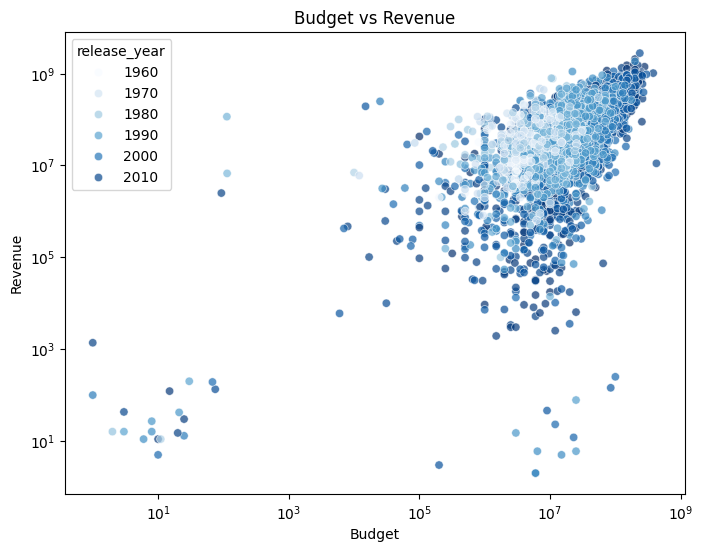

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tmdb["budget"], y=tmdb["revenue"], alpha=0.7, data = tmdb , hue="release_year", palette ='Blues')
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue")
plt.xscale("log")
plt.yscale("log")
plt.show()

Here we noticed that most of the films when the it's budget increase the revenue increase , but some films it's budget is high but the revenue is low and some films it's budget is low but it's revenue is high

so the there is relation between budget and revenue


---

### Research Question 2

what is the most common run time ?

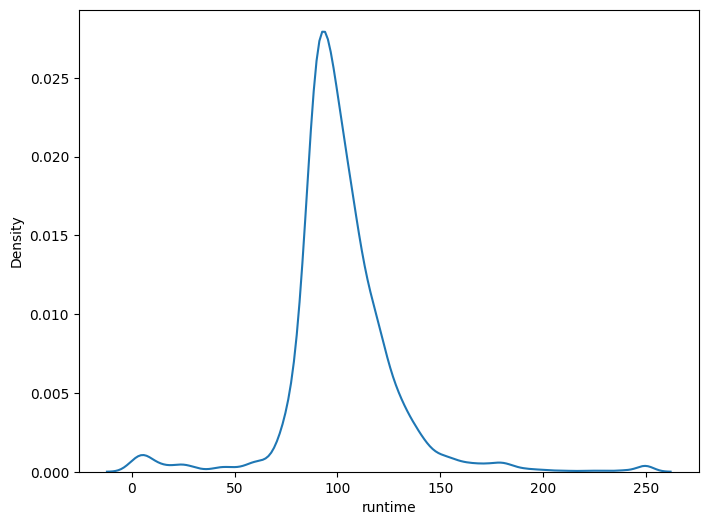

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(tmdb['runtime'].clip(upper=250))
plt.show()

We noticed that the most common run time is between 50 and 150

---

<a id='conclusions'></a>
## Conclusions

After all of that , we wrangled the data then we cleaned the data and we faced many problems like **invalid dtype** , **missing values** and **duplicates** .

i was surprised when i know that there is 1 duplicate , i thought there is like **1000 duplicate** .

this data frame was so hard because there is too much problems

we made visualization to answer our question .

**1st question is :** Is there Relation Between the budget and revenue?,
and we made visualization to answer the question and we noticed that the relation between budget and revenue is direct relation relatively.

**2nd question is :** what is the most common run time ?, 
and we made visualization to answer the question and we noticed that the most common run time for fils is between 50 to 150 min .

the hardest thing in this dataset is that release date be **logic** .


and thank you .

